In [38]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os
from url_prep_helper import URLPrepHelper

In [43]:
# Loading the saved model
with open('../models/best_url_phishing_model.pkl', 'rb') as f:
    model = joblib.load(f)

In [3]:
directory_path = "../datasets/url_dataset"
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path)
               if file.endswith(".csv")]

dataframes = []

for file in csv_files:
    try:
        df = pd.read_csv(file)
        dataframes.append(df)
    except pd.errors.ParserError as e:
        print(f"Error parsing file {file}: {e}")

df = pd.concat(dataframes, ignore_index=True)


In [6]:
def preprocess(df):
    helper = URLPrepHelper(df, url_column_name='URL')
    helper.remove_www()
    helper.add_extracted_url_length()
    helper.add_processed_tld()
    helper.add_extracted_url_features()
    helper.add_abnormal_url_feature()
    helper.add_is_https_feature()
    helper.add_digits_count()
    helper.add_letters_count()
    helper.add_shortening_service()
    helper.add_having_ip_address()
    
    
    

In [7]:
X_new = df[['URL', 'label']]
X_new.head()
preprocess(X_new)
X_new.head()

t:\MS in AI courses\Machine Learning\Final Project\fishing_website_classifier\iter3\phishing_url\url_prep_helper.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.url_column_name] = self.df[self.url_column_name].str.replace('www.', '', regex=True)
t:\MS in AI courses\Machine Learning\Final Project\fishing_website_classifier\iter3\phishing_url\url_prep_helper.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['url_len'] = self.df[self.url_column_name].apply(lambda x: len(str(x)))
t:

,URL,label,url_len,domain,@,?,-,=,.,#,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,https://southbankmosaics.com,1,28,southbankmosaics.com,0,0,0,0,1,0,...,0,0,0,1,1,1,0,24,0,0
1,https://uni-mainz.de,1,20,uni-mainz.de,0,0,1,0,1,0,...,0,0,0,1,1,1,0,15,0,0
2,https://voicefmradio.co.uk,1,26,voicefmradio.co.uk,0,0,0,0,2,0,...,0,0,0,1,1,1,0,21,0,0
3,https://sfnmjournal.com,1,23,sfnmjournal.com,0,0,0,0,1,0,...,0,0,0,1,1,1,0,19,0,0
4,https://rewildingargentina.org,1,30,rewildingargentina.org,0,0,0,0,1,0,...,0,0,0,1,1,1,0,26,0,0


In [10]:
X = X_new.drop(['URL', 'label', 'domain'],axis=1)
X.head()

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,28,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,24,0,0
1,20,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,15,0,0
2,26,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,0,21,0,0
3,23,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,19,0,0
4,30,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,26,0,0


In [47]:
model_predictions = model.predict(X)

In [49]:
X_new["predicted_class"] = model_predictions
X_new.head()


C:\Users\toufic.f\AppData\Local\Temp\ipykernel_12676\2485673454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new["predicted_class"] = model_predictions


,URL,label,url_len,domain,@,?,-,=,.,#,...,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address,predicted_class_encoded,predicted_class
0,https://southbankmosaics.com,1,28,southbankmosaics.com,0,0,0,0,1,0,...,0,1,1,1,0,24,0,0,2,2
1,https://uni-mainz.de,1,20,uni-mainz.de,0,0,1,0,1,0,...,0,1,1,1,0,15,0,0,2,2
2,https://voicefmradio.co.uk,1,26,voicefmradio.co.uk,0,0,0,0,2,0,...,0,1,1,1,0,21,0,0,2,2
3,https://sfnmjournal.com,1,23,sfnmjournal.com,0,0,0,0,1,0,...,0,1,1,1,0,19,0,0,2,2
4,https://rewildingargentina.org,1,30,rewildingargentina.org,0,0,0,0,1,0,...,0,1,1,1,0,26,0,0,2,2


In [51]:
mapping = {3: 1, 2: 1, 1: 1, 0: 0}
X_new['predicted_class'] = X_new['predicted_class'].map(mapping)
X_new.head()

C:\Users\toufic.f\AppData\Local\Temp\ipykernel_12676\3458143367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['predicted_class'] = X_new['predicted_class'].map(mapping)


,URL,label,url_len,domain,@,?,-,=,.,#,...,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address,predicted_class_encoded,predicted_class
0,https://southbankmosaics.com,1,28,southbankmosaics.com,0,0,0,0,1,0,...,0,1,1,1,0,24,0,0,2,1
1,https://uni-mainz.de,1,20,uni-mainz.de,0,0,1,0,1,0,...,0,1,1,1,0,15,0,0,2,1
2,https://voicefmradio.co.uk,1,26,voicefmradio.co.uk,0,0,0,0,2,0,...,0,1,1,1,0,21,0,0,2,1
3,https://sfnmjournal.com,1,23,sfnmjournal.com,0,0,0,0,1,0,...,0,1,1,1,0,19,0,0,2,1
4,https://rewildingargentina.org,1,30,rewildingargentina.org,0,0,0,0,1,0,...,0,1,1,1,0,26,0,0,2,1


In [53]:
X_new['predicted_class_encoded'] = X_new['predicted_class'].replace({1: "Phishing URL", 0: "Safe URL"})
X_new.head()

C:\Users\toufic.f\AppData\Local\Temp\ipykernel_12676\2443843993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['predicted_class_encoded'] = X_new['predicted_class'].replace({1: "Phishing URL", 0: "Safe URL"})


,URL,label,url_len,domain,@,?,-,=,.,#,...,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address,predicted_class_encoded,predicted_class
0,https://southbankmosaics.com,1,28,southbankmosaics.com,0,0,0,0,1,0,...,0,1,1,1,0,24,0,0,Phishing URL,1
1,https://uni-mainz.de,1,20,uni-mainz.de,0,0,1,0,1,0,...,0,1,1,1,0,15,0,0,Phishing URL,1
2,https://voicefmradio.co.uk,1,26,voicefmradio.co.uk,0,0,0,0,2,0,...,0,1,1,1,0,21,0,0,Phishing URL,1
3,https://sfnmjournal.com,1,23,sfnmjournal.com,0,0,0,0,1,0,...,0,1,1,1,0,19,0,0,Phishing URL,1
4,https://rewildingargentina.org,1,30,rewildingargentina.org,0,0,0,0,1,0,...,0,1,1,1,0,26,0,0,Phishing URL,1


C:\Users\toufic.f\AppData\Local\Temp\ipykernel_12676\912194922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new["correct_prediction"] = X_new['label'] == X_new['predicted_class']


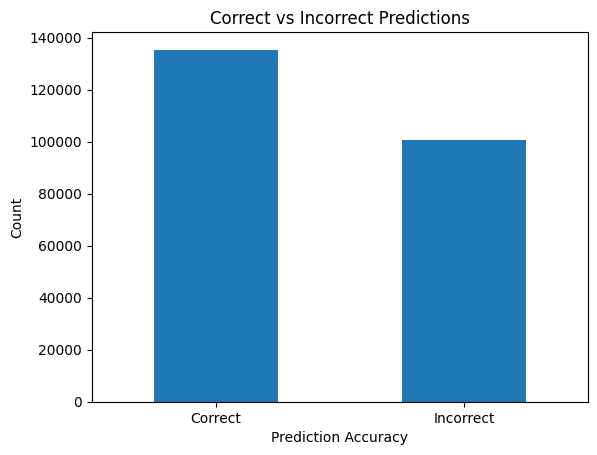

In [54]:
X_new["correct_prediction"] = X_new['label'] == X_new['predicted_class']

comparison = X_new["correct_prediction"].value_counts()

# Plot the comparison
comparison.plot(kind='bar', stacked=True)
plt.xticks([0, 1], ['Correct', 'Incorrect'], rotation=0)
plt.xlabel('Prediction Accuracy')
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions')
plt.show()


In [ ]:
X_new.to_csv('new_url_dataset_with_predictions.csv', index=False)